## Spotify Metal Models

In [1]:
### import necessary libraries
library(tidyverse) 
library(ggplot2)
library(sqldf)
list.files(path = "../input")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



[1] "-spotify-tracks-dataset"

In [2]:
### import the basic dataframe
stdf = read.csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')

In [3]:
### take a peak
head(stdf)

,X,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,⋯,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,⋯,-6.746,0,0.1430,0.0322,1.01e-06,0.3580,0.715,87.917,4,acoustic
2,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,⋯,-17.235,1,0.0763,0.9240,5.56e-06,0.1010,0.267,77.489,4,acoustic
3,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,⋯,-9.734,1,0.0557,0.2100,0.00e+00,0.1170,0.120,76.332,4,acoustic
4,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,⋯,-18.515,1,0.0363,0.9050,7.07e-05,0.1320,0.143,181.740,3,acoustic
5,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,⋯,-9.681,1,0.0526,0.4690,0.00e+00,0.0829,0.167,119.949,4,acoustic
6,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,⋯,-8.807,1,0.1050,0.2890,0.00e+00,0.1890,0.666,98.017,4,acoustic


In [4]:
### find out how many observations each genre has
agg_tbl <- stdf %>% 
group_by(track_genre) %>% 
summarise(total_count=n(),
            .groups = 'drop')

df2 <- agg_tbl %>% as.data.frame()
head(df2)

,track_genre,total_count
,<chr>,<int>
1,acoustic,1000
2,afrobeat,1000
3,alt-rock,1000
4,alternative,1000
5,ambient,1000
6,anime,1000


In [5]:
### sort the dataframe to only have genres that are "metal"
metaldf = sqldf("SELECT * FROM stdf WHERE track_genre LIKE '%etal%'")
metaldf = metaldf[c(3:21)]
head(metaldf)
nrow(metaldf)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,Cradle Of Filth,Lovecraft & Witch Hearts,Hallowed Be Thy Name,51,430733,False,0.428,0.972,2,-1.998,0,0.0666,7.16e-05,0.0736,0.0787,0.2250,118.306,4,black-metal
2,Make Them Suffer,Doomswitch,Doomswitch,58,275205,True,0.250,0.952,9,-4.059,0,0.2090,2.45e-05,0.0135,0.0892,0.1260,143.022,3,black-metal
3,Behemoth,I Loved You at Your Darkest,Bartzabel,47,301285,False,0.468,0.913,6,-5.670,1,0.0720,2.65e-02,0.0769,0.0787,0.1870,109.003,4,black-metal
4,Sadness,I Want to Be There,I Want to Be with You,41,355474,False,0.144,0.466,5,-6.715,1,0.0522,6.86e-01,0.4230,0.0764,0.0737,87.290,4,black-metal
5,Cradle Of Filth,Nymphetamine Special Edition,Nymphetamine Fix,54,302360,False,0.462,0.905,0,-3.825,0,0.0438,6.60e-04,0.0402,0.0839,0.2530,122.925,3,black-metal
6,ORM,Intet • Altet,Fra dyden,26,1478618,False,0.174,0.664,6,-12.485,0,0.0789,1.28e-03,0.2640,0.0543,0.0371,127.958,3,black-metal


[1] 5000

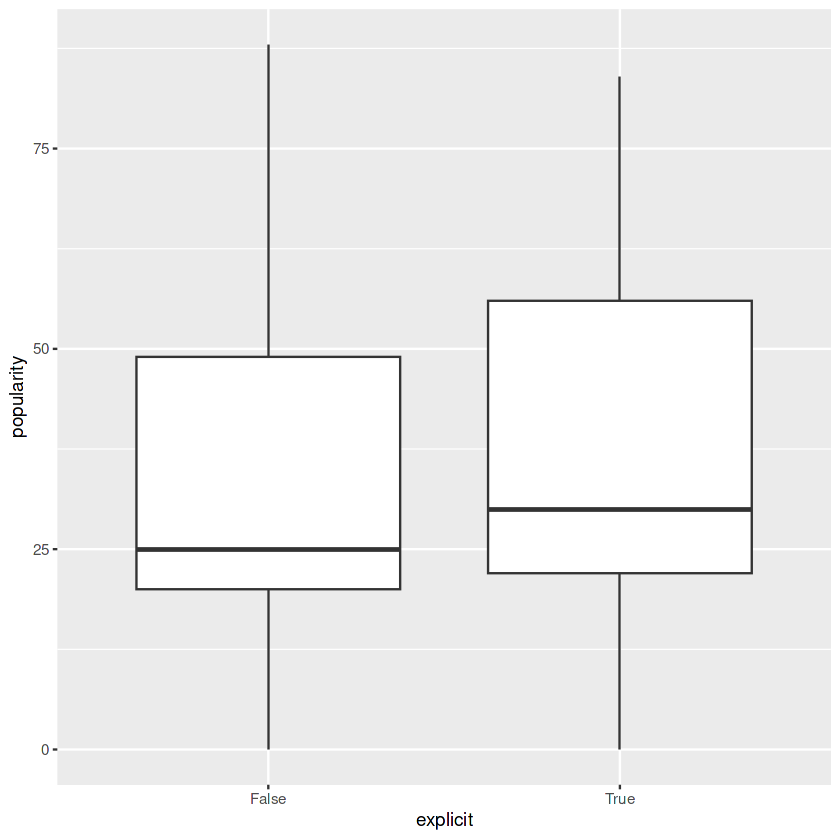

In [18]:
ggplot(data = metaldf, aes(x = explicit, y = popularity)) + 
    geom_boxplot()

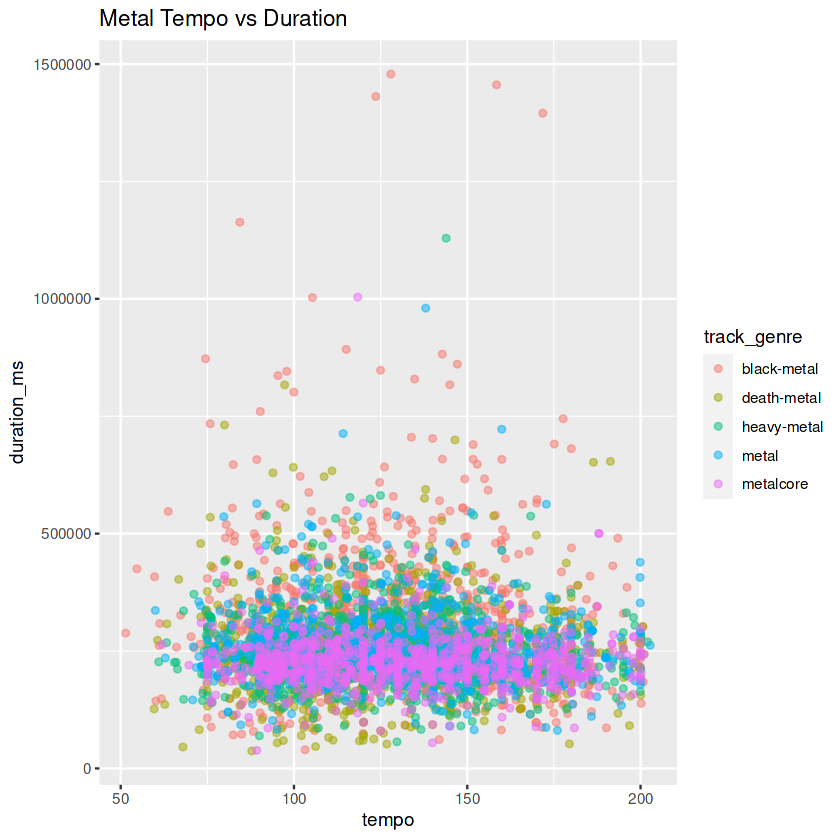

In [6]:
### take a look at tempo versus duration (in milliseconds)
ggplot(data = metaldf, aes(x = tempo, y = duration_ms, color = track_genre)) +
    geom_point(alpha = .5) +
    ggtitle("Metal Tempo vs Duration")

In [11]:
### regress explicitness to determine popularity
summary(lm(popularity ~ explicit, data = metaldf))

### regress duration to determine popularity
summary(lm(popularity ~ duration_ms, data = metaldf))

### regress tempo to determine popularity
summary(lm(popularity ~ tempo, data = metaldf))


Call:
lm(formula = popularity ~ explicit, data = metaldf)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.146 -13.146  -7.611  16.854  55.389 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   32.6112     0.3070 106.209  < 2e-16 ***
explicitTrue   5.5347     0.7245   7.639  2.6e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.67 on 4998 degrees of freedom
Multiple R-squared:  0.01154,	Adjusted R-squared:  0.01134 
F-statistic: 58.36 on 1 and 4998 DF,  p-value: 2.605e-14



Call:
lm(formula = popularity ~ duration_ms, data = metaldf)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.714 -13.226  -8.111  17.265  54.264 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.595e+01  7.835e-01  45.880  < 2e-16 ***
duration_ms -9.032e-06  2.824e-06  -3.199  0.00139 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.76 on 4998 degrees of freedom
Multiple R-squared:  0.002043,	Adjusted R-squared:  0.001843 
F-statistic: 10.23 on 1 and 4998 DF,  p-value: 0.001389



Call:
lm(formula = popularity ~ tempo, data = metaldf)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.825 -13.535  -7.734  17.419  54.387 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.219095   1.239329   26.80   <2e-16 ***
tempo        0.003028   0.009470    0.32    0.749    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.78 on 4998 degrees of freedom
Multiple R-squared:  2.046e-05,	Adjusted R-squared:  -0.0001796 
F-statistic: 0.1023 on 1 and 4998 DF,  p-value: 0.7491


Based on a 95% confidence interval (and even true through a 99% confidence interval), a song belonging to one of the five metal subgenres in this dataset has just over a 5 point increase in popularity, while each additional millisecond decreases popularity by -9.032 * (10^-6), or .000009032, meaning each additional minute comes at the cost of roughly half a point of popularity. Tempo does not have a statistically significant effect on popularity.

In [7]:
### build a regression model based on certain traits to determine popularity
metallm = lm(popularity ~ loudness + duration_ms + explicit + 
             energy + instrumentalness + tempo, data = metaldf)
summary(metallm)


Call:
lm(formula = popularity ~ loudness + duration_ms + explicit + 
    energy + instrumentalness + tempo, data = metaldf)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.653 -12.346  -5.361  15.849  54.908 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.841e+01  3.058e+00  22.373  < 2e-16 ***
loudness          1.467e+00  1.438e-01  10.199  < 2e-16 ***
duration_ms      -1.016e-06  2.830e-06  -0.359    0.720    
explicitTrue      5.401e+00  7.114e-01   7.592 3.74e-14 ***
energy           -2.971e+01  2.559e+00 -11.611  < 2e-16 ***
instrumentalness -9.610e+00  9.346e-01 -10.283  < 2e-16 ***
tempo             5.193e-03  9.190e-03   0.565    0.572    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.05 on 4993 degrees of freedom
Multiple R-squared:  0.07324,	Adjusted R-squared:  0.07213 
F-statistic: 65.76 on 6 and 4993 DF,  p-value: < 2.2e-16


In [8]:
metalloud = sqldf("
    SELECT track_genre, 
    AVG(loudness), 
    AVG(instrumentalness),
    AVG(duration_ms),
    AVG(energy),
    AVG(popularity)
    FROM metaldf 
    GROUP BY track_genre")
metalloud

track_genre,AVG(loudness),AVG(instrumentalness),AVG(duration_ms),AVG(energy),AVG(popularity)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
black-metal,-6.528524,0.44084682,311103.1,0.8748973,22.449
death-metal,-5.350307,0.27573075,247492.7,0.9314700,32.169
heavy-metal,-5.756366,0.08255638,252109.3,0.8740030,26.226
metal,-5.425439,0.06460310,256463.0,0.8402730,43.705
metalcore,-4.457694,0.04569475,229006.6,0.9144850,43.477


In [9]:
heavydf = sqldf("SELECT * FROM stdf WHERE track_genre = 'heavy-metal'")
heavydf = heavydf[c(3:21)]
head(heavydf)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,X JAPAN,BLUE BLOOD REMASTERED EDITION,紅(イントロ ストリングス) - Remaster,37,379133,False,0.250,0.979,8,-5.472,0,0.4190,3.40e-03,1.22e-04,0.183,0.0595,156.341,4,heavy-metal
2,Riff,Que Sea Rock,Mala Noche,41,247253,False,0.522,0.857,4,-4.941,0,0.0308,1.57e-04,9.58e-05,0.354,0.5380,96.177,4,heavy-metal
3,Los Antiguos,Madera Prohibida,El Inventor Del Mal,35,283376,False,0.424,0.915,4,-5.182,1,0.0308,7.29e-06,6.89e-02,0.391,0.2450,92.718,4,heavy-metal
4,De La Tierra,De La Tierra,Maldita Historia,35,266800,False,0.405,0.990,6,-3.067,1,0.0880,7.73e-04,4.01e-01,0.180,0.2750,170.062,4,heavy-metal
5,Riff,Que Sea Rock,Lily Malone,40,302586,False,0.512,0.848,11,-5.559,0,0.0365,1.80e-05,2.69e-04,0.378,0.3740,127.616,4,heavy-metal
6,Asspera,Hijo de Puta,Partiendo Cabezas,36,300328,True,0.507,0.961,1,-4.647,1,0.0568,1.68e-04,8.35e-05,0.703,0.7590,75.002,4,heavy-metal


In [10]:
heavylm = lm(popularity ~ loudness + duration_ms + explicit + 
             energy + instrumentalness + tempo, data = heavydf)
summary(heavylm)


Call:
lm(formula = popularity ~ loudness + duration_ms + explicit + 
    energy + instrumentalness + tempo, data = heavydf)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.742  -5.091  -2.620   2.273  38.411 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.578e+01  3.191e+00   8.081 1.85e-15 ***
loudness         -3.975e-01  1.338e-01  -2.970  0.00305 ** 
duration_ms      -7.226e-08  3.628e-06  -0.020  0.98411    
explicitTrue      3.433e-02  9.580e-01   0.036  0.97142    
energy           -2.111e+00  2.616e+00  -0.807  0.41981    
instrumentalness -3.790e+00  1.325e+00  -2.861  0.00431 ** 
tempo             2.581e-03  9.653e-03   0.267  0.78922    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.278 on 993 degrees of freedom
Multiple R-squared:  0.02258,	Adjusted R-squared:  0.01667 
F-statistic: 3.823 on 6 and 993 DF,  p-value: 0.0008944
